

# Project: TMDb Movies Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, an analysis of a data set that contains information of about 10,000 movies (from 1966 to 2015) collected from The Movie Database (TMDb) will be conducted.
 
 
>*Research Questions*:
      
      Q1: Has the consumer taste change from 1966 to 2015?
     
      Q2: How did movie reviews change?
      
      Q3: How did movie profits change?
      
      Q4: How has the number of movies released change?

In [478]:
# Import all packages needed for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> Overview and reading of the dataset

### General Properties

Print the first few rows to read and understand data 

In [40]:
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Summary of the dataframe including datatype and the number of null values

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Total number of rows and columns

In [42]:
df.shape

(10866, 21)



### Data Cleaning 

1- Drop irrelevant columns

2- Check duplicates

3- Check null values

In [46]:
# Deleting columns that are related to the website itself which is irrelevant to the research
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','runtime','release_date'],axis =1,inplace = True)

In [47]:
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [479]:
#Check for duplicates
sum(df.duplicated())


1

In [480]:
#Drop the duplicate
df.drop_duplicates(inplace=True)

In [481]:
#Check again it's dropped
sum(df.duplicated())

0

In [483]:
#Check for null values
df.isnull().sum()

popularity                 0
profit                     0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [484]:
#Drop null values
df.dropna(inplace=True)

In [485]:
#Check again, False means there is no null
df.isnull().sum().any()

False

<a id='eda'></a>
## Exploratory Data Analysis

> With the clean data that's now available, start exploring the TMDb dataset by making questions and answering them.

### Research Question 1 
### Has the consumer taste change from 1966 to 2015?


Firstly, consumer taste in **1966**

In [486]:
#Retrieve the dataframe that's associated with the year 1966.
df66=df.loc[df['release_year']==1966]
df66

,popularity,profit,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
10820,1.227582,-315000,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,Chuck Jones|Ben Washam,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,286,7.1,1966,2.116175e+06,0.000000e+00
10821,0.929393,0,0,0,Fahrenheit 451,Oskar Werner|Julie Christie|Cyril Cusack|Bee D...,FranÃ§ois Truffaut,Drama|Science Fiction,Anglo Enterprises|Vineyard Film Ltd.,93,6.8,1966,0.000000e+00,0.000000e+00
10822,0.670274,26236689,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,Drama,Chenault Productions,74,7.5,1966,5.038511e+07,2.266436e+08
10823,0.613444,0,0,0,One Million Years B.C.,Raquel Welch|John Richardson|Percy Herbert|Rob...,Don Chaffey,Action|Adventure|Fantasy,Hammer Film Productions,17,5.6,1966,0.000000e+00,0.000000e+00
10824,0.533292,-18000000,18000000,0,The Bible: In the Beginning...,Michael Parks|Ulla Bergryd|Richard Harris|Fran...,John Huston,Drama,Seven Arts Productions|Dino de Laurentiis Cine...,18,5.8,1966,1.209243e+08,0.000000e+00
10825,0.509263,0,0,0,Blow-Up,David Hemmings|Vanessa Redgrave|Sarah Miles|Jo...,Michelangelo Antonioni,Drama|Mystery|Thriller,Bridge Films|Metro-Goldwyn-Mayer (MGM)|Carlo P...,103,6.8,1966,0.000000e+00,0.000000e+00
10826,0.418900,0,0,0,A Man for All Seasons,Paul Scofield|Wendy Hiller|Leo McKern|Robert S...,Fred Zinnemann,Drama|History,Highland Films,29,6.3,1966,0.000000e+00,0.000000e+00
10827,0.410366,-1377800,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,Leslie H. Martinson,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,99,5.9,1966,9.256081e+06,0.000000e+00
10828,0.402730,10000000,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,Mystery|Thriller,Universal Pictures,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,1347000,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,Action|Western,Paramount Pictures|Laurel Productions,36,6.9,1966,3.125892e+07,4.030809e+07


In [487]:
#Split the genres
df_split = df66['genres'].str.split("|",expand=True)
df_split

,0,1,2,3,4
10820,Animation,Family,Comedy,None,None
10821,Drama,Science Fiction,None,None,None
10822,Drama,None,None,None,None
10823,Action,Adventure,Fantasy,None,None
10824,Drama,None,None,None,None
10825,Drama,Mystery,Thriller,None,None
10826,Drama,History,None,None,None
10827,Family,Adventure,Comedy,Science Fiction,Crime
10828,Mystery,Thriller,None,None,None
10829,Action,Western,None,None,None


In [254]:
df66.shape

(46, 13)

In [488]:
#Percentage of each genre in the total amount of movies released that year.
split = (df_split.value_counts([0],[1],[2],[3],[4]))*100
split

Animation           2.272727
Documentary         2.272727
Romance             2.272727
Science Fiction     2.272727
War                 2.272727
Family              4.545455
Horror              4.545455
Thriller            4.545455
Western             4.545455
Mystery             6.818182
Adventure           9.090909
Drama              11.363636
Comedy             18.181818
Action             25.000000
Name: proportion, dtype: float64

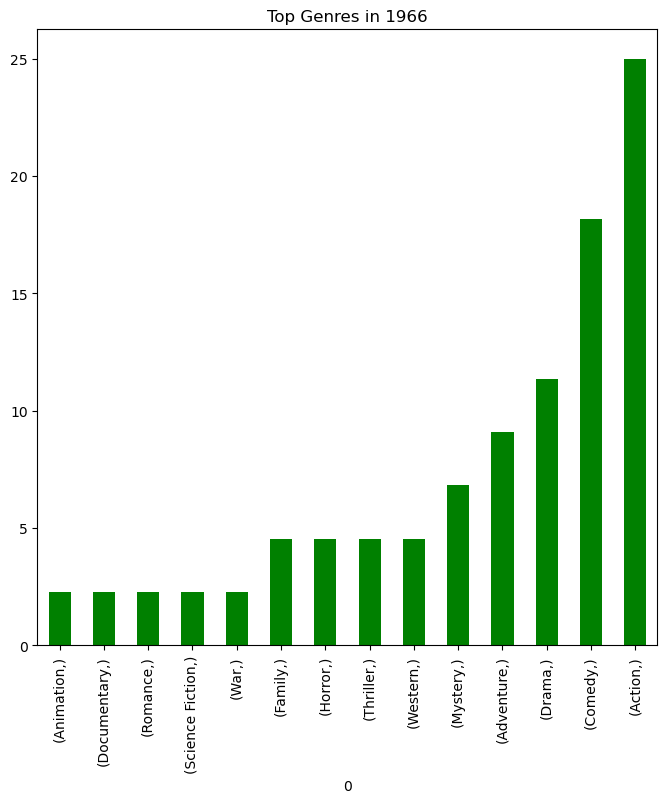

In [498]:
split.plot(x='key', y='value',kind='bar',figsize=(8,8), color='green');

plt.title('Top Genres in 1966')
plt.show()


Secondly, consumer taste in **2015**

In [490]:
#Retreive 2015 dataframe
df2015=df.loc[df['release_year']==2015]
df2015

,popularity,profit,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,185238201,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,1868178225,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1316249360,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0.025252,0,0,0,The Gamechangers,Daniel Radcliffe|Bill Paxton|Joe Dempsie,Owen Harris,Drama|TV Movie,BBC Films|British Broadcasting Corporation (BB...,11,7.0,2015,0.000000e+00,0.000000e+00
619,0.023026,0,0,0,Residue,Natalia Tena|Iwan Rheon|Jamie Draven|Danny Web...,Alex Garcia Lopez,Science Fiction|Mystery|Horror|Thriller,Screen Yorkshire|Gloucester Place Films|Green ...,15,4.5,2015,0.000000e+00,0.000000e+00
621,0.019804,0,0,0,Always Watching: A Marble Hornets Story,Alexandra Breckenridge|Doug Jones|Jake McDorma...,James Moran,Horror,Good Universe|Mosaic Films|Institution Post,19,4.2,2015,0.000000e+00,0.000000e+00
624,0.017625,732655,0,732655,Once I Was a Beehive,Paris Warner|Lisa Clark|Hailey Smith|Clare Nie...,Maclain Nelson,Comedy|Drama|Family,Escapology|Main Dog Productions,10,6.5,2015,0.000000e+00,6.740423e+05


In [491]:
#Split genres
df_split2 = df2015['genres'].str.split("|",expand=True)
df_split2

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
618,Drama,TV Movie,None,None,None
619,Science Fiction,Mystery,Horror,Thriller,None
621,Horror,None,None,None,None
624,Comedy,Drama,Family,None,None


In [492]:
#Percentage of each genre
split2 = (df_split2.value_counts([0],[1],[2],[3],[4]))*100
split2

Western             0.358423
War                 0.537634
TV Movie            0.896057
History             1.075269
Music               1.612903
Family              1.792115
Fantasy             1.792115
Mystery             1.971326
Animation           2.150538
Adventure           3.225806
Science Fiction     3.405018
Crime               3.763441
Romance             3.942652
Documentary         5.017921
Action             10.035842
Horror             10.573477
Thriller           12.186380
Comedy             12.544803
Drama              23.118280
Name: proportion, dtype: float64

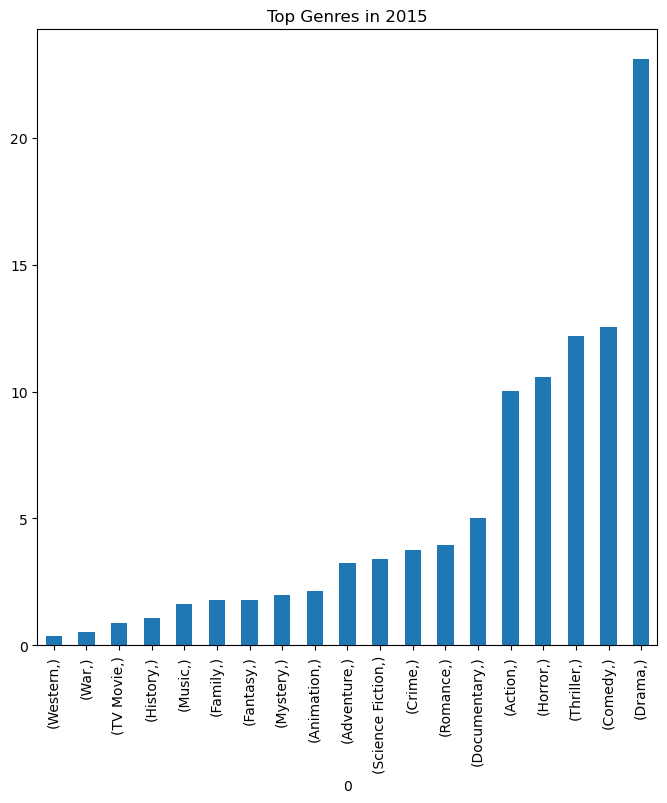

In [500]:
split2.plot(x='key', y='value',kind='bar',figsize=(8,8));

plt.title("Top Genres in 2015")
plt.show()

### Conclusion 2
The top genre in 1966 was **Action**, while in 2015 was **Drama**.

We can also see that there are new genres that appeared in 2015 such as: TV Movie, History, Music, Fantasy, and Crime. This means that the consumer taste has also evolved into new genres.

### Research Question 2
### How did movie reviews change over time?

We will work with two variables: The independent variable is the time in release_year column and the dependent variable
is the movie rating in vote_average column.
We need to groupby() the table by release_year and calculate the mean() of vote_average for each year.

First we define a function to calculate the mean of one column then groupby the result by another column.

We will use this function in Q2 & Q3

In [501]:
#defining a function to calculate the mean for column2 and groupby by column1
def groupby_avg(column1,column2):
    avg_gb_data = df.groupby(column1)[column2].mean()
    return avg_gb_data


Visualize results

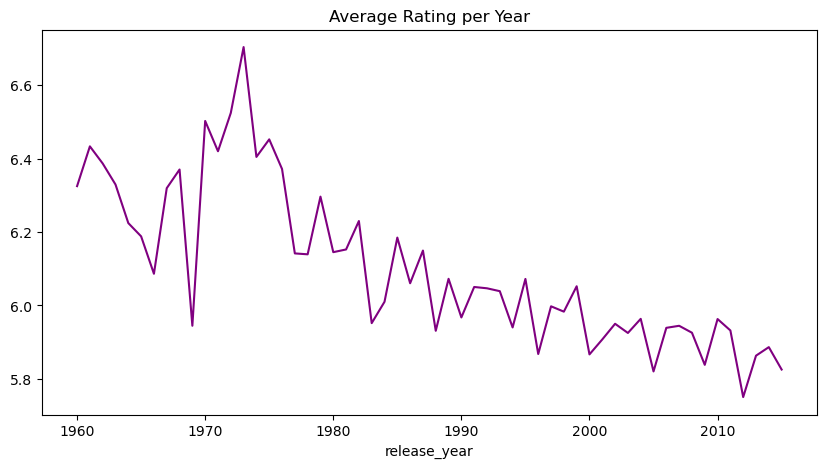

In [502]:
#Call the groupby_avg function and pass release_year and vote_average arguments
avg_rating_year = groupby_avg("release_year","vote_average")
#Plotting
avg_rating_year.plot(kind='line',color='purple',title='Average Rating per Year',figsize = (10,5))


plt.show()

### Conclusion 2
The average rating of movies has **decreased** over the years.

Could this be the downfall of the movie industry?

### Research Question 3
### How did movie profits change over time?

We will work with two variables: The independent variable is the time in release_year column and the dependent varible is the  profit column.

We need first to calculate the profit by subtracting budget column from revenue column. And adding a new column with the name profit by insert()

In [468]:
#Adding the new column
df.insert(1,"profit",df["revenue"] - df["budget"])
df.head()

,popularity,profit,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1363528810,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,228436354,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,185238201,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,1868178225,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1316249360,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


We need to groupby() the table by release_year and calculate the mean() of profit for each year. we will use the groupby_avg function.

Now we want visualize the result to draw a conclusion.

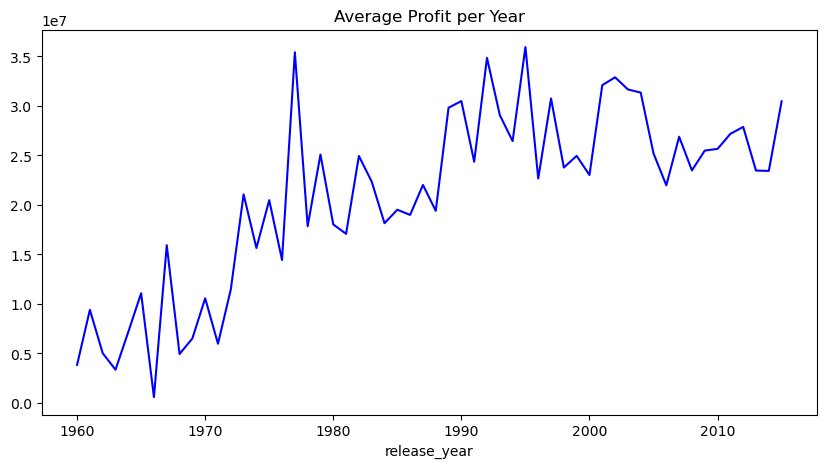

In [470]:
#Call the groupby function
avg_profit_year=groupby_avg("release_year","profit")
#Plotting
avg_profit_year.plot(kind="line",color='blue',title='Average Profit per Year',figsize=(10,5))


plt.show()

### Conclusion 3
The average profit of movies has **increased** over the years.

This means that the movie industry isn't downgrading, could be only bad production!

### Research Question 4
### How did the number of movies released change over time?

We will work with two variables: The independent variable is the time in release_year column and the dependent variable is the number of movies.

First we need to calculate the number of movies in each year by value_counts() release_years column, and sort the years by sort_index().

Now we want visualize the result to draw a conclusion

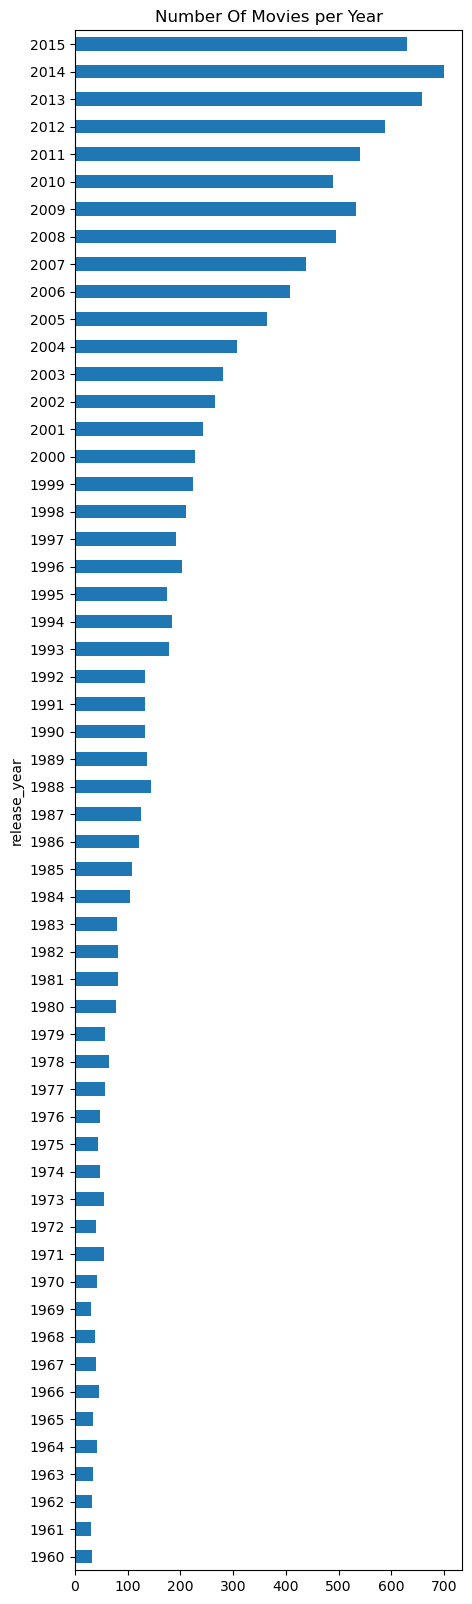

In [477]:
#Count the number of movies in each year
count_movies_year = df['release_year'].value_counts().sort_index()

#Plotting### Conclusion 3
The average profit of movies has **increased** over the years.

This means that the movie industry isn't downgrading, could be only bad production!
count_movies_year.plot(kind='barh',title='Number Of Movies per Year', figsize=(5,20));



### Conclusion 4
The number of movies has increased drastically over the years.

Highest records of movies released is in **2014**, with **700** movies!

<a id='conclusions'></a>
##  Final Conclusions

> <ul>
    <li>Movie ratings are getting worse over time.</li>
    <li>The movie industry is a profitable one.</li>
    <li>The number of movies released are increasing over time</li>
</ul>

